# Data Analysis - Crimes Cibernéticos relacionados a área da saúde

#### Feito por: Leonardo Ferreira Moreira e Thales Correard Motta

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
tab = pd.read_csv('./breach_report.csv', low_memory=False, delimiter= ',', encoding = 'ISO-8859-1', decimal = '.')
tab.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/09,Theft,Paper/Films,No,A binder containing the protected health infor...
1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/09,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/09,Theft,"Other, Other Portable Electronic Device",No,\N
3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/09,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/09,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


In [4]:
tab.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [29]:
tab.describe()

,Individuals Affected
count,1.677000e+03
mean,1.007082e+05
std,1.979060e+06
min,5.000000e+02
25%,1.000000e+03
50%,2.300000e+03
75%,7.526000e+03
max,7.880000e+07


## Total de indivíduos afetados

In [30]:
tab['Individuals Affected'].sum(skipna = True)

168887690.0

## Gráfico referente aos Estados mais afetados

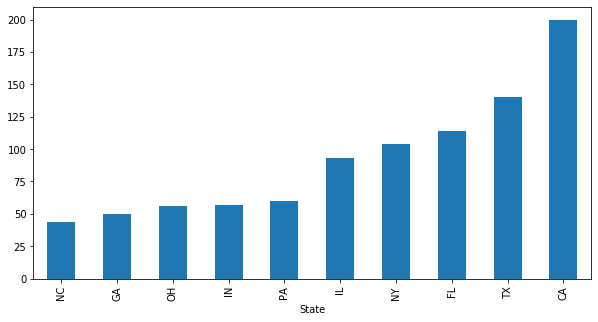

In [41]:
tab.groupby('State').size().sort_values().tail(10).plot(kind='bar', figsize=(10,5))

## Gráfico referente aos tipos de entidade com maior taxa de invasão

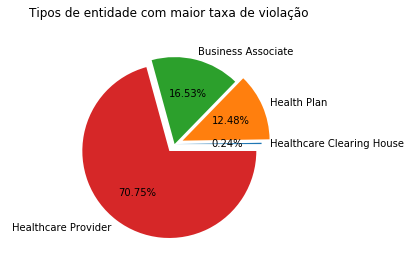

In [33]:
legendas = 'Healthcare Clearing House', 'Health Plan', 'Business Associate', 'Healthcare Provider'
plt.axis('equal')
plt.pie(tab['Covered Entity Type'].value_counts().sort_values(), autopct="%1.2f%%", labels = legendas, explode = [0,0.1,0,0.1])     
plt.suptitle("Tipos de entidade com maior taxa de violação")

plt.show()

## Gráfico referente aos locais onde foram retirados as informações

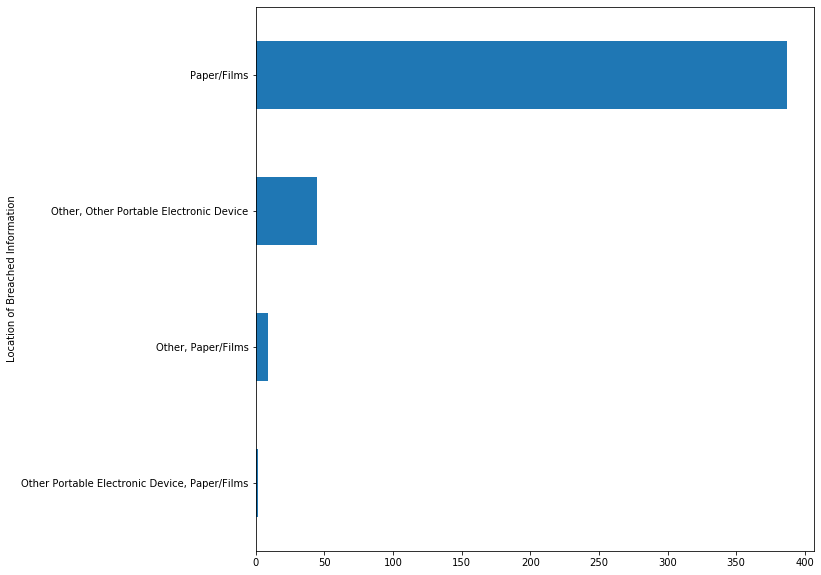

In [35]:
tab.groupby('Location of Breached Information').size().tail(4).sort_values().plot(kind='barh', figsize=(10,10))

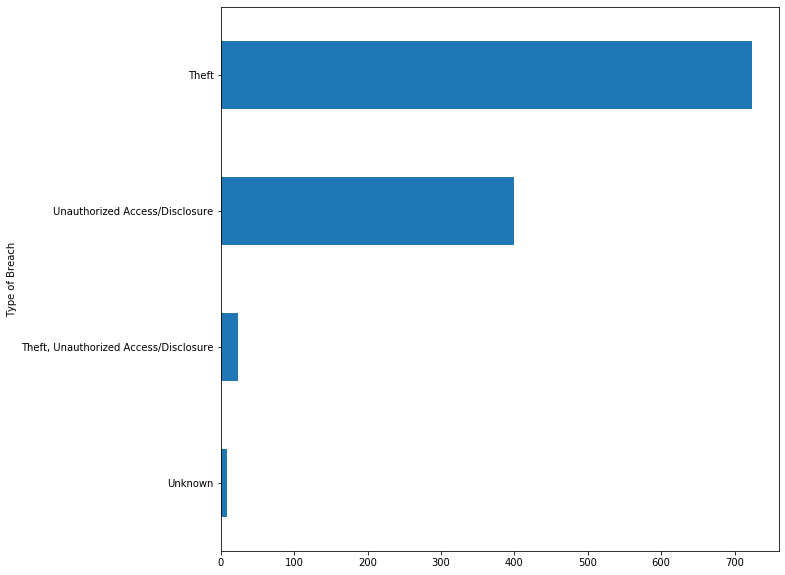

In [38]:
tab.groupby('Type of Breach').size().tail(4).sort_values().plot(kind='barh', figsize=(10,10))